<a href="https://colab.research.google.com/github/rmonterof/Scikit-learn/blob/main/1_18_Clasificaci%C3%B3n_multiclase_Regresi%C3%B3n_log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación multiclase

Ejemplo utilizando Regresión logística (LogisticRegression)

Dataset: iris

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score


In [ ]:
# load through url
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
# df = pd.read_csv(url, names = attributes)
# df.columns = attributes
# df

In [ ]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

[Text(0, 0, '50'), Text(0, 0, '50'), Text(0, 0, '50')]

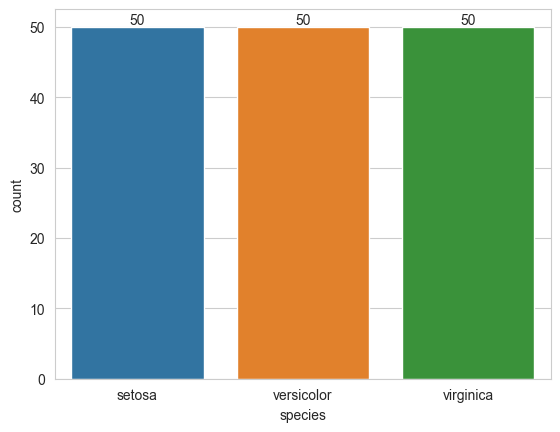

In [ ]:
ax = sns.countplot(x='species', data=df)
ax.bar_label(ax.containers[0])

In [ ]:
train, test = train_test_split(df, test_size = 0.4, stratify = df['species'], random_state = 42)

In [ ]:
train.groupby('species').size()

species
setosa        30
versicolor    30
virginica     30
dtype: int64

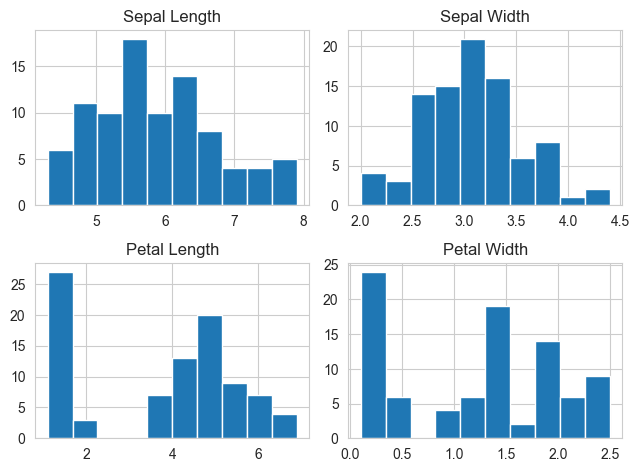

In [ ]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins)
axs[0,0].set_title('Sepal Length')
axs[0,1].hist(train['sepal_width'], bins = n_bins)
axs[0,1].set_title('Sepal Width')
axs[1,0].hist(train['petal_length'], bins = n_bins)
axs[1,0].set_title('Petal Length')
axs[1,1].hist(train['petal_width'], bins = n_bins)
axs[1,1].set_title('Petal Width')

# add some spacing between subplots
fig.tight_layout(pad=1.0)

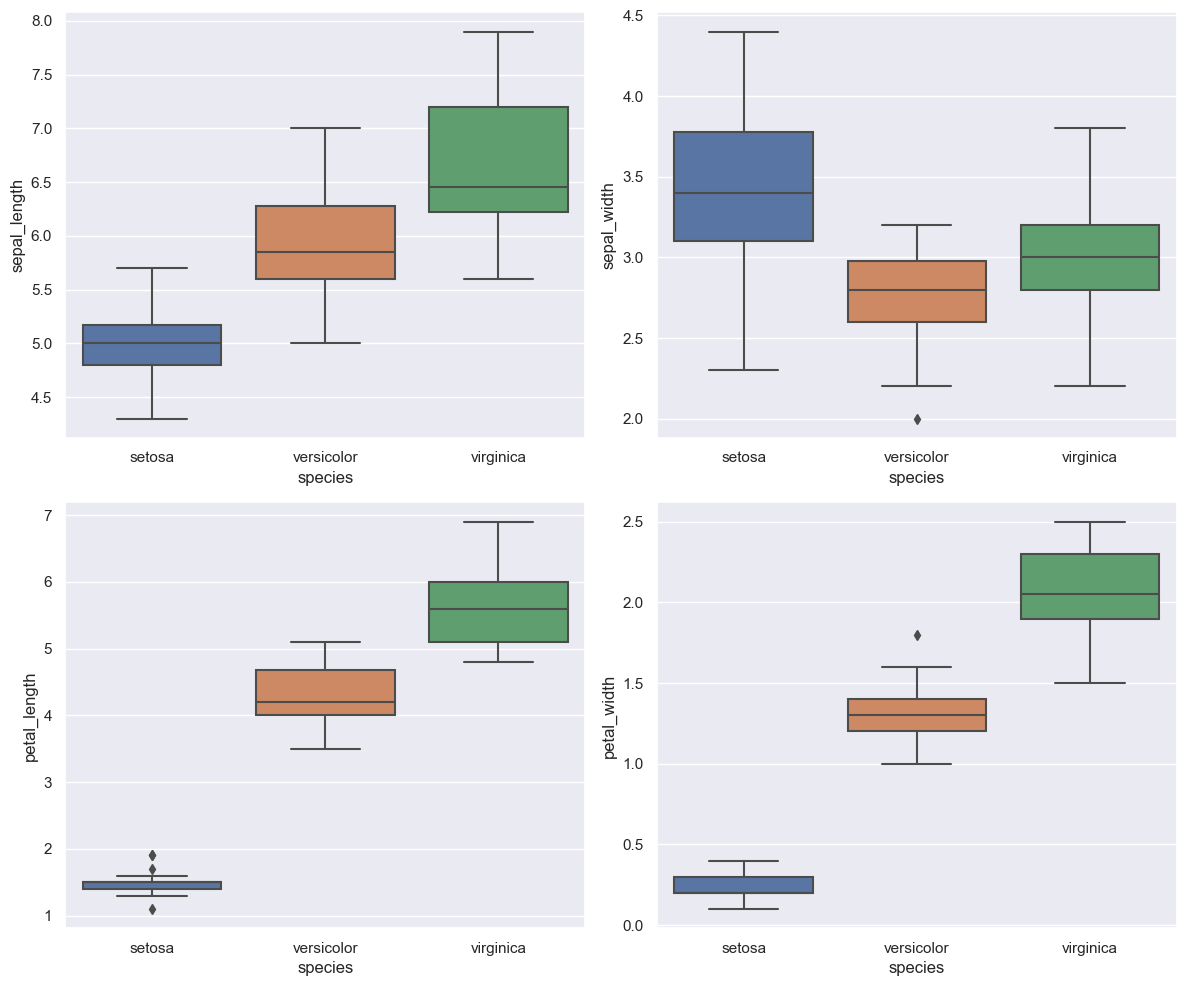

In [ ]:
sns.set(rc={"figure.figsize":(12, 10)}) #width=6, height=5
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data = train, order = cn, ax = axs[0,0])
sns.boxplot(x = 'species', y = 'sepal_width', data = train, order = cn, ax = axs[0,1])
sns.boxplot(x = 'species', y = 'petal_length', data = train, order = cn, ax = axs[1,0])
sns.boxplot(x = 'species', y = 'petal_width', data = train,  order = cn, ax = axs[1,1])
# add some spacing between subplots
fig.tight_layout(pad=1.0)

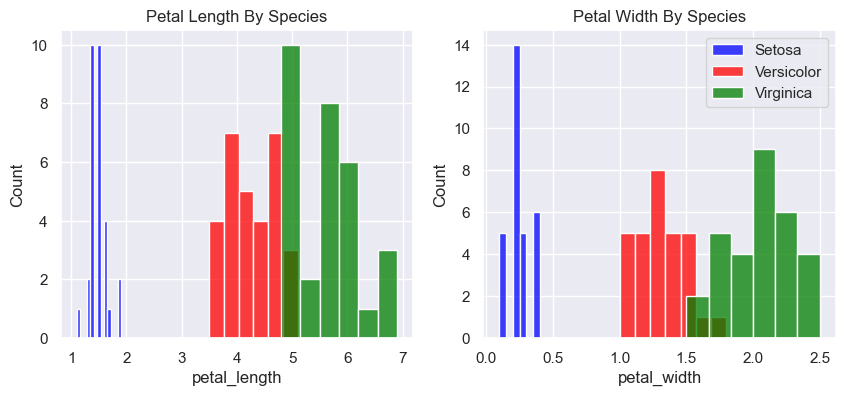

In [ ]:
setosa_pl = train.loc[train.species=='setosa', 'petal_length']
versicolor_pl = train.loc[train.species=='versicolor', 'petal_length']
virginica_pl = train.loc[train.species=='virginica', 'petal_length']
setosa_pw = train.loc[train.species=='setosa', 'petal_width']
versicolor_pw = train.loc[train.species=='versicolor', 'petal_width']
virginica_pw = train.loc[train.species=='virginica', 'petal_width']

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10,4)

ax1 = sns.histplot(setosa_pl, color="blue", label="Setosa", ax = axs[0])
ax1.set_title('Petal Length By Species')
ax1 = sns.histplot(versicolor_pl, color="red", label="Versicolor", ax = axs[0])
ax1 = sns.histplot(virginica_pl, color="green", label="Virginica", ax = axs[0])

ax2 = sns.histplot(setosa_pw, color="blue", label="Setosa", ax = axs[1])
ax2.set_title('Petal Width By Species')
ax2 = sns.histplot(versicolor_pw, color="red", label="Versicolor", ax = axs[1])
ax2 = sns.histplot(virginica_pw, color="green", label="Virginica", ax = axs[1])

plt.legend();

<AxesSubplot: xlabel='species', ylabel='petal_length'>

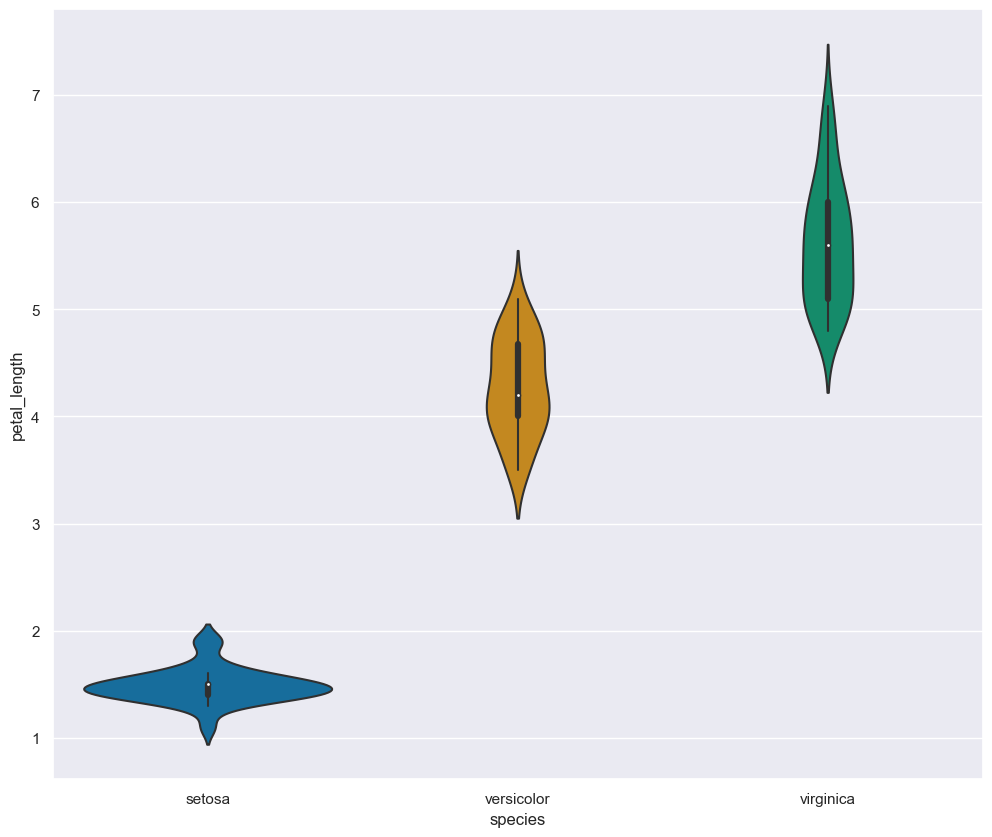

In [ ]:
sns.violinplot(x="species", y="petal_length", data=train, size=5, order = cn, palette = 'colorblind')

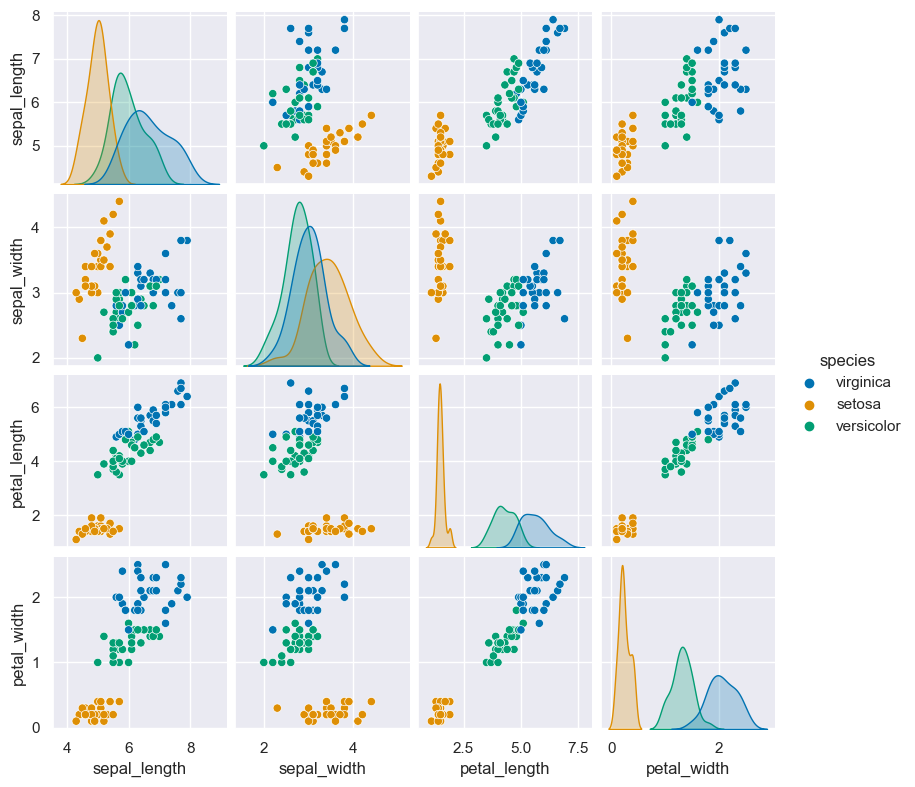

In [ ]:
sns.pairplot(train, hue="species", height = 2, palette = 'colorblind')

<AxesSubplot: >

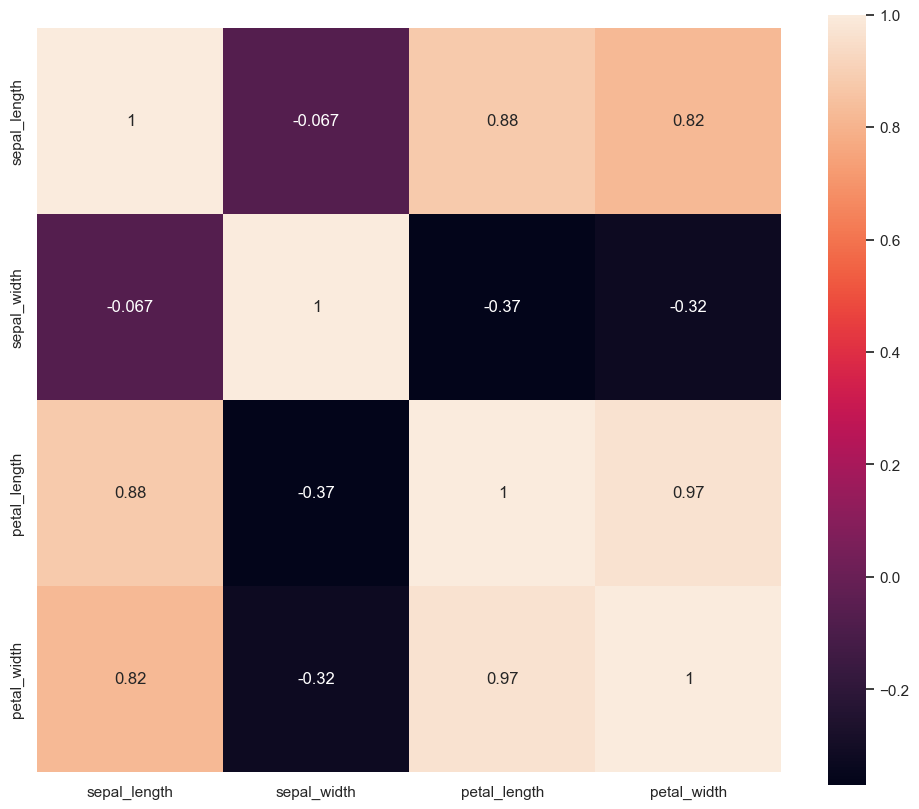

In [ ]:
sns.heatmap(train.corr(numeric_only=True), annot = True, square = True)

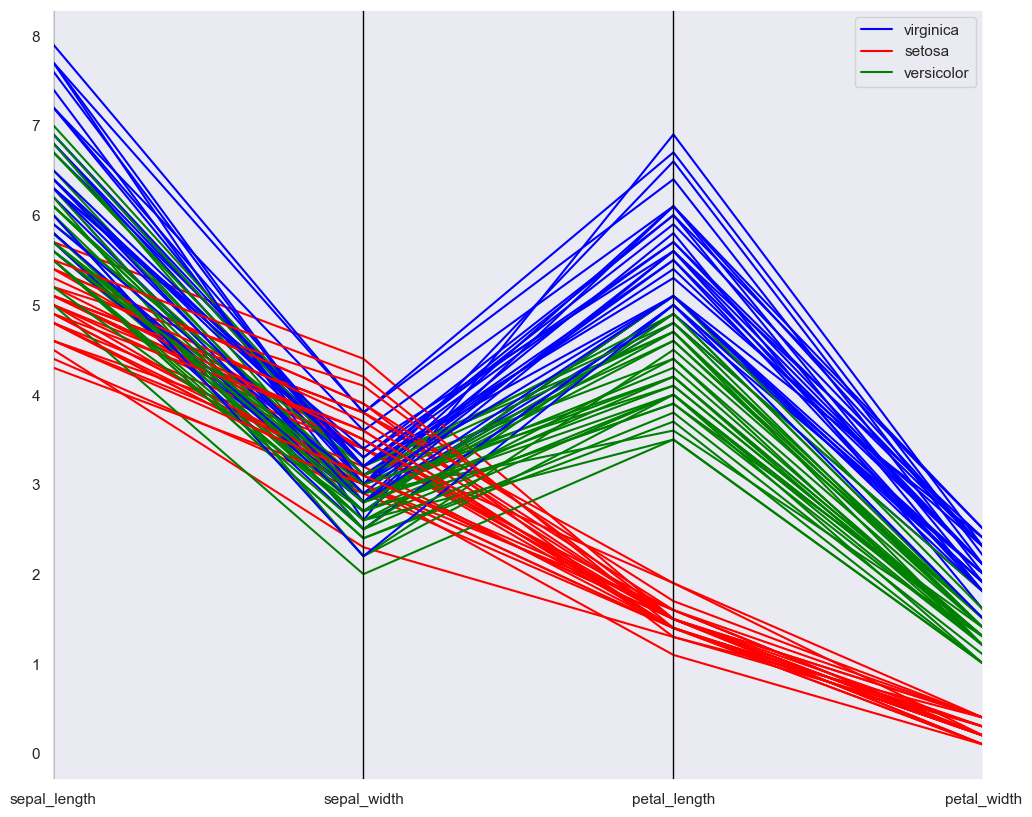

In [ ]:
parallel_coordinates(train, "species", color = ['blue', 'red', 'green']);

In [ ]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
print(cm)

[[20  0  0]
 [ 0 19  1]
 [ 0  2 18]]


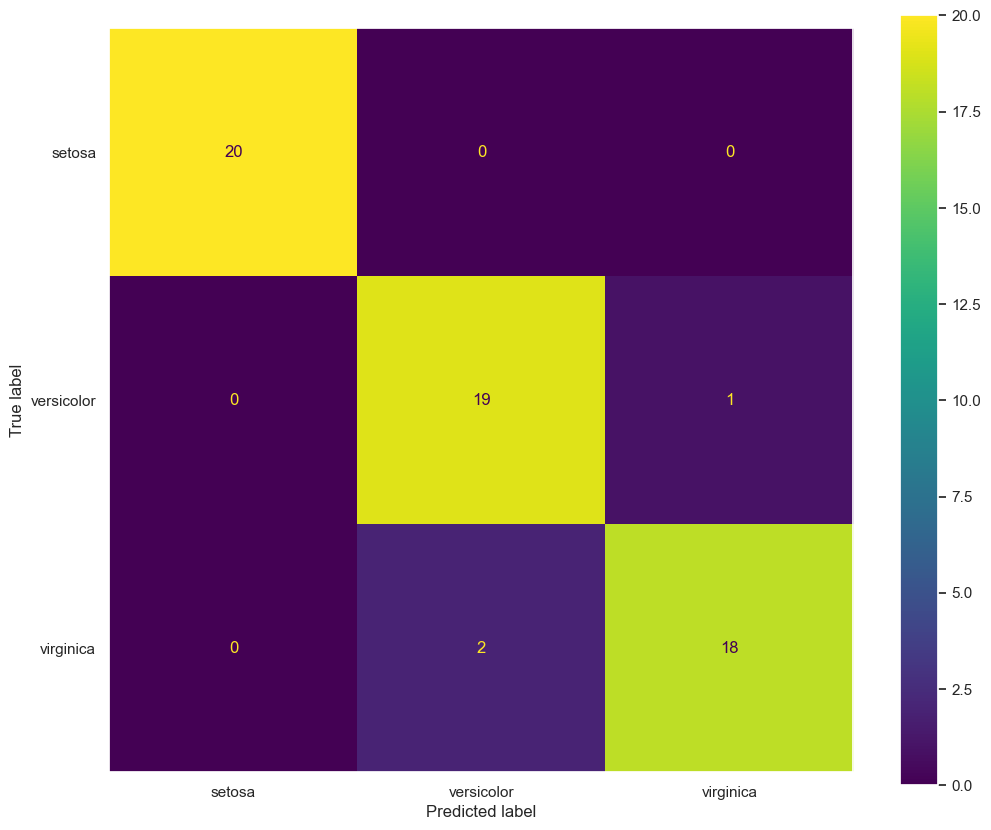

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp = disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.grid(False)
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.90      0.95      0.93        20
   virginica       0.95      0.90      0.92        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [ ]:
print("accuracy: ", accuracy_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred, average='weighted'))
print("recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))
print("AUC: ", roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovo'))

accuracy:  0.95
precision:  0.9507101086048454
recall:  0.95
F1-score:  0.9499687304565353
AUC:  0.9983333333333334


In [ ]:
from sklearn.metrics import roc_curve, auc


def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

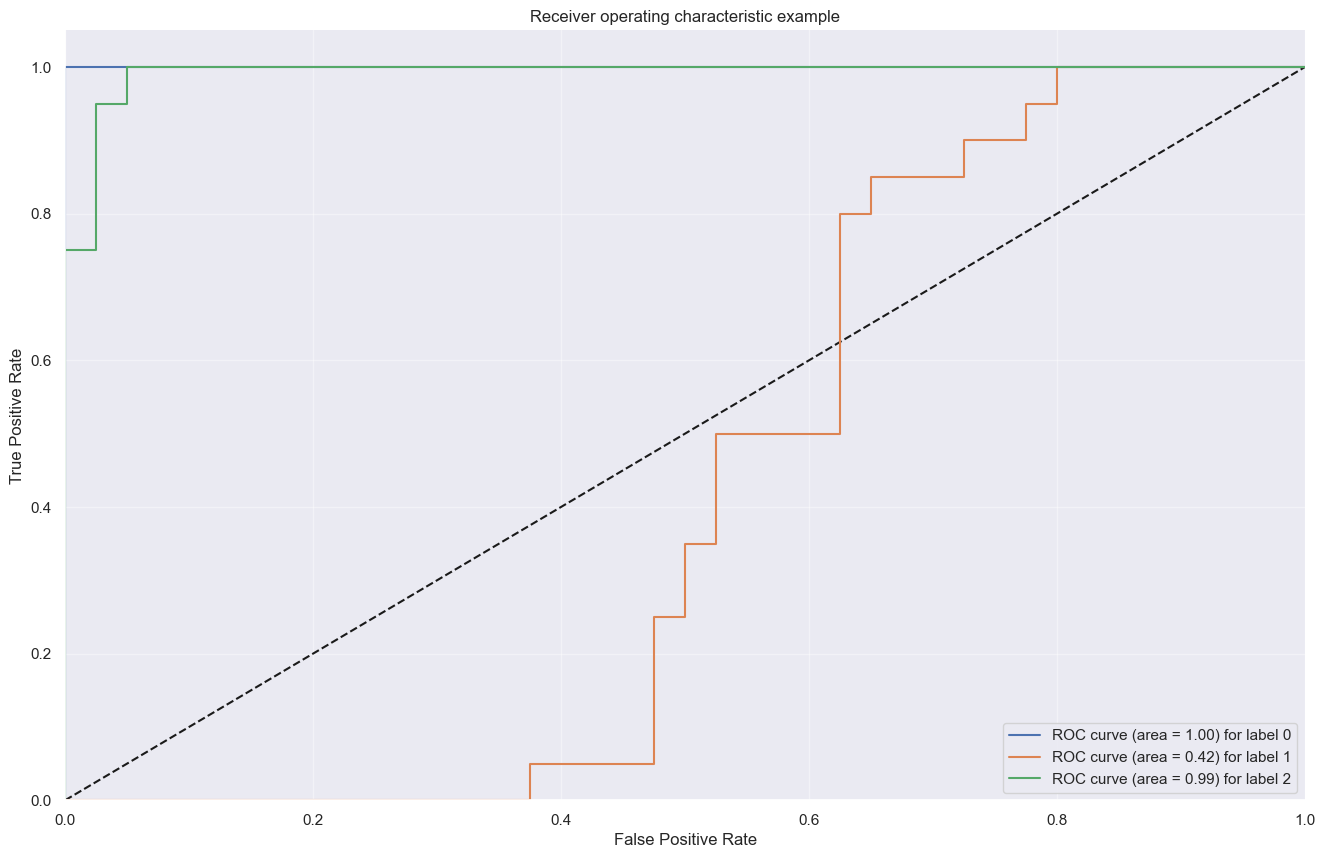

In [ ]:
plot_multiclass_roc(model, X_test, y_test, n_classes=3, figsize=(16, 10))